In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1=pd.read_csv('smoke_detection_iot.csv')

In [3]:
df1.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [5]:
df1.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [6]:
#Data Cleaning
df1.drop(columns=['UTC','CNT'],inplace=True)
df1

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


<AxesSubplot:xlabel='Fire Alarm', ylabel='Count'>

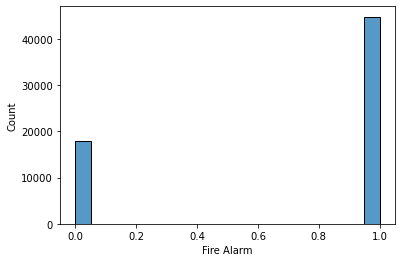

In [7]:
sns.histplot(df1['Fire Alarm'])

([<matplotlib.patches.Wedge at 0x282e73c0070>,
 [Text(-0.6867566913298193, 0.8592818204254757, 'Yes'),
  Text(0.6867567717815868, -0.8592817561266699, 'No')])

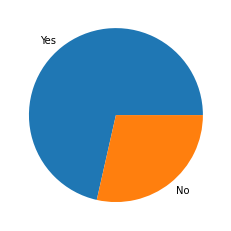

In [8]:
Alarm=df1['Fire Alarm'].value_counts()
plt.pie(Alarm,labels=['Yes','No'])

<AxesSubplot:>

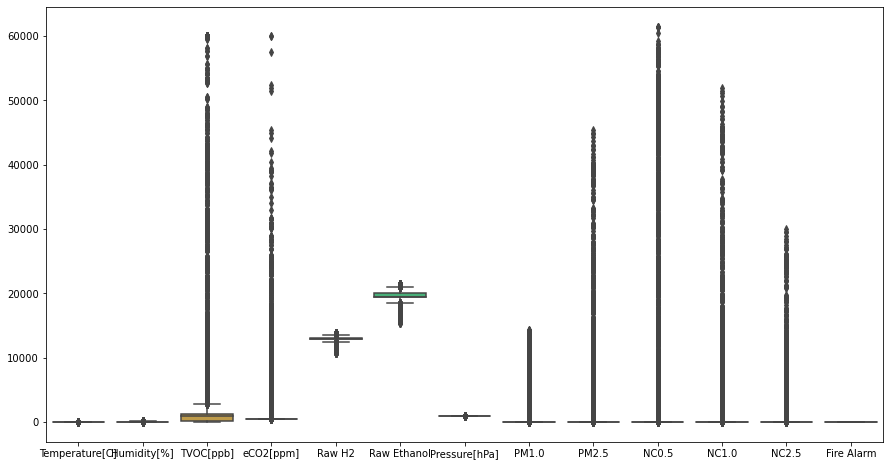

In [9]:
#Outlier Detection

plt.figure(figsize=[15,8])
sns.boxplot(data=df1)

In [10]:
from datasist.structdata import detect_outliers
index = detect_outliers(df1,0,['Humidity[%]','TVOC[ppb]','eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5'])
len(index)



17492

In [11]:
#There are 17492 outliers
df2=df1.drop(index,axis="index")
df2.shape

(45138, 13)

<AxesSubplot:>

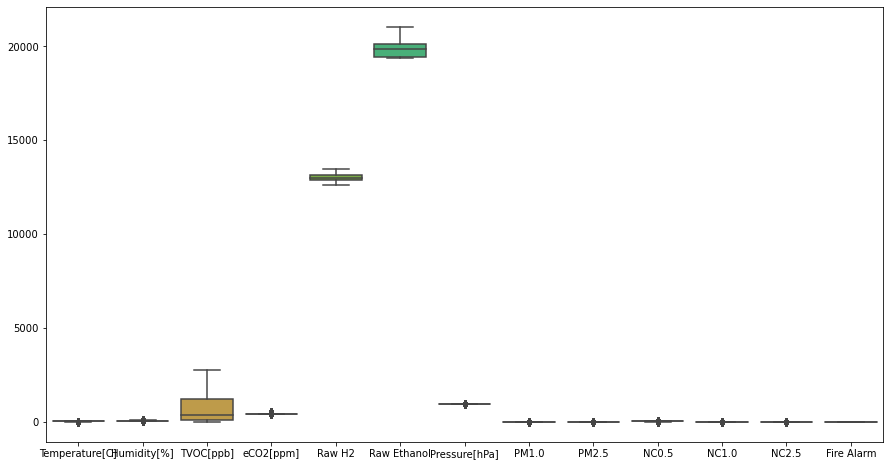

In [12]:
#Outliers have been removed
plt.figure(figsize=[15,8])
sns.boxplot(data=df2)

In [13]:
df2.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,45138.000000,45138.000000,45138.000000,45138.000000,45138.000000,45138.000000,45138.000000,45138.000000,45138.000000,45138.000000,45138.000000,45138.000000,45138.000000
mean,14.450607,50.164449,671.406575,409.226151,12988.085471,19832.527139,938.846095,1.598678,1.661247,11.002310,1.716166,0.039054,0.733927
std,13.629518,3.833715,560.066876,17.698939,147.028350,451.952974,0.732548,0.609173,0.632174,4.194453,0.652938,0.014479,0.441908
min,-22.010000,38.980000,0.000000,400.000000,12609.000000,19357.000000,936.915000,0.070000,0.090000,0.430000,0.099000,0.007000,0.000000
25%,7.582750,47.760000,112.000000,400.000000,12880.000000,19428.000000,938.705000,1.380000,1.440000,9.510000,1.484000,0.034000,0.000000
50%,19.708000,50.170000,362.000000,400.000000,12961.000000,19860.000000,938.772000,1.770000,1.840000,12.160000,1.896000,0.043000,1.000000
75%,25.015000,53.220000,1203.000000,411.000000,13122.000000,20120.000000,939.604000,2.000000,2.080000,13.780000,2.150000,0.049000,1.000000
max,32.130000,61.800000,2754.000000,495.000000,13438.000000,21042.000000,939.856000,3.190000,3.320000,21.970000,3.426000,0.077000,1.000000


<AxesSubplot:xlabel='Fire Alarm', ylabel='Count'>

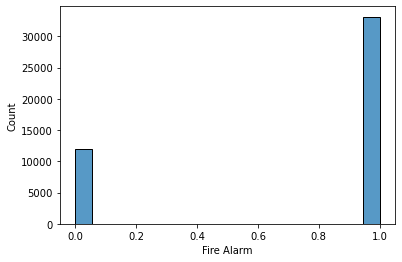

In [14]:
sns.histplot(df2['Fire Alarm'])

In [15]:
#According to above histogram Dataset is imbalanced
#Synthetic Minority Oversampling Technique is used to balance it

X = df2.drop(columns='Fire Alarm')
y = df2['Fire Alarm']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 18, stratify= y)

In [17]:
y_train.value_counts()

1    26502
0     9608
Name: Fire Alarm, dtype: int64

In [18]:
y_test.value_counts()

1    6626
0    2402
Name: Fire Alarm, dtype: int64

In [19]:
x_train.duplicated().sum()

2

In [20]:
#balance the train data for two labels here
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

1    26502
0    26502
Name: Fire Alarm, dtype: int64

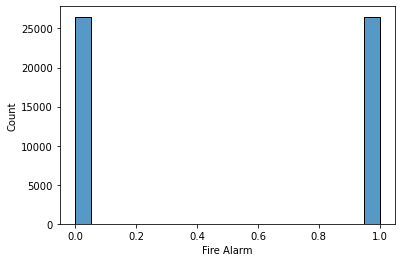

In [21]:
sns.histplot(y_train_smote)
y_train_smote.value_counts()

In [22]:
x_train_smote

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,-9.219000,50.960000,26,400,13248,20215,939.759000,2.400000,2.490000,16.520000,2.576000,0.058000
1,26.960000,47.840000,1356,400,12977,19389,938.709000,1.680000,1.740000,11.540000,1.800000,0.041000
2,22.390000,47.760000,58,400,13242,20156,939.630000,2.080000,2.160000,14.290000,2.229000,0.050000
3,-5.081000,53.290000,221,400,13148,20044,939.553000,0.450000,0.460000,3.060000,0.478000,0.011000
4,26.900000,47.480000,1254,400,12964,19420,938.729000,1.930000,2.000000,13.270000,2.069000,0.047000
...,...,...,...,...,...,...,...,...,...,...,...,...
52999,14.213036,54.512343,29,400,13048,19934,939.773376,0.375120,0.390240,2.576081,0.402168,0.009000
53000,26.256890,50.985317,32,400,12868,19819,939.810642,0.303578,0.313578,2.078257,0.324578,0.007000
53001,-9.249162,42.805087,83,405,12777,20648,937.483293,2.153774,2.232337,14.812229,2.310313,0.051988
53002,26.051114,47.063004,131,412,12781,20586,937.341278,1.806587,1.876587,12.450155,1.941650,0.043532


In [23]:
#convert the train target values into the numpy array
train_target=y_train_smote.values
train_target

test_target=y_test.values
test_target

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [24]:
#Only Train data are Sacaled,No need of Scaling the target (y) values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data = scaler.fit_transform(x_train_smote)
test_data = scaler.transform(x_test)

In [25]:
train_data

array([[-1.92986788,  0.40866769, -0.85449672, ...,  1.37792218,
         1.38055185,  1.37289384],
       [ 0.87744357, -0.32130188,  1.58762275, ...,  0.21845864,
         0.21843984,  0.21098978],
       [ 0.52283418, -0.34001905, -0.79573896, ...,  0.85872465,
         0.86089609,  0.82611546],
       ...,
       [-1.93220831, -1.49929335, -0.74983446, ...,  0.98031201,
         0.98266838,  0.96199458],
       [ 0.80691854, -0.50309153, -0.66169782, ...,  0.43036456,
         0.43057048,  0.38402698],
       [ 0.86476899, -0.88452443, -0.82511784, ...,  1.51497705,
         1.51802767,  1.50958844]])

In [26]:
from sklearn.svm import SVC
model = SVC()
model.fit(train_data,train_target)

SVC()

In [27]:
y_pred = model.predict(test_data)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_target, y_pred))
print(classification_report(test_target, y_pred))

[[2402    0]
 [   2 6624]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2402
           1       1.00      1.00      1.00      6626

    accuracy                           1.00      9028
   macro avg       1.00      1.00      1.00      9028
weighted avg       1.00      1.00      1.00      9028



In [29]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(test_target, y_pred)
print('Accuracy:',acc)

Accuracy: 0.9997784669915818
